# [TRANSFORMAÇÕES GEOMÉTRICAS]
##  Escala: Redução em 1.5x e aumentar em 2.5x
##  Rotação em 45º, 90º e 100º
##  Translação em 50 pixels para direita e 50 pixels para cima
##  Translação em 35 pixel no eixo X, 45 eixo Y

### Importando bibliotecas

In [1]:
import numpy as np
from numpy import asarray
from PIL import Image, ImageFilter
import cv2
from scipy.signal import convolve2d, medfilt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

### print_final_result() :: void
função responsável por mostrar o resultado final da imagem através da biblioteca matplotlib e aplicar as transformações geométricas na imagem original.

In [2]:
def print_final_result(img_path1, img_path2, img_path3, title, function,lib ,angle=None,scale_factor=None, tx=None, ty=None):
    if(lib.lower()=='opencv'):
        imgLena = cv2.imread(img_path1,cv2.IMREAD_GRAYSCALE)
        imgCameraman = cv2.imread(img_path2,cv2.IMREAD_GRAYSCALE)
        imgHouse = cv2.imread(img_path3,cv2.IMREAD_GRAYSCALE)
    else:
        imgLena = Image.open(img_path1)
        f_imgLena = asarray(imgLena)
        imgCameraman = Image.open(img_path2)
        f_imgCameraman = asarray(imgCameraman)
        imgHouse = Image.open(img_path3)
        f_imgHouse = asarray(imgHouse)
    
    print(title)
    
    plt1 = plt.subplot(1,3,1)
    plt2 = plt.subplot(1,3,2)
    plt3 = plt.subplot(1,3,3)
    
    plt1.set_title('Lena')
    plt2.set_title('Cameraman')
    plt3.set_title('House')
    
    
    if(lib.lower()=='numpy'):
        
        
        if(title.find('rotacionada') != -1):
            plt1.imshow(function(f_imgLena, angle), cmap='gray')
            plt2.imshow(function(f_imgCameraman, angle), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse, angle), cmap='gray', vmin=0, vmax=255)
        elif(title.find('escala') != -1):
            T = np.array([[scale_factor, 0, 0], 
                        [0, scale_factor, 0], 
                        [0,       0,      1]])
            plt1.imshow(function(f_imgLena, T), cmap='gray')
            plt2.imshow(function(f_imgCameraman, T), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse, T), cmap='gray', vmin=0, vmax=255)
        elif(title.find('transladada') != -1):
            plt1.imshow(function(f_imgLena, tx, ty), cmap='gray')
            plt2.imshow(function(f_imgCameraman, tx, ty), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse, tx, ty), cmap='gray', vmin=0, vmax=255)
        else:
            plt1.imshow(function(f_imgLena), cmap='gray')
            plt2.imshow(function(f_imgCameraman), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse), cmap='gray', vmin=0, vmax=255)
            
            
    elif (lib.lower() == 'pillow'):
        if(title.find('rotacionada') != -1):
            plt1.imshow(function(imgLena, angle), cmap='gray')
            plt2.imshow(function(imgCameraman, angle), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(imgHouse, angle), cmap='gray', vmin=0, vmax=255)
        elif(title.find('escala') != -1):
            plt1.imshow(function(imgLena, scale_factor), cmap='gray')
            plt2.imshow(function(imgCameraman, scale_factor), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(imgHouse, scale_factor), cmap='gray', vmin=0, vmax=255)
        elif(title.find('transladada') != -1):
            plt1.imshow(function(imgLena, tx, ty), cmap='gray')
            plt2.imshow(function(imgCameraman, tx, ty), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(imgHouse, tx, ty), cmap='gray', vmin=0, vmax=255)
        else:
            plt1.imshow(function(f_imgLena), cmap='gray')
            plt2.imshow(function(f_imgCameraman), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse), cmap='gray', vmin=0, vmax=255)
            
            
    elif (lib.lower() == 'opencv'):
        if(title.find('rotacionada') != -1):
            plt1.imshow(function(imgLena, angle), cmap='gray')
            plt2.imshow(function(imgCameraman, angle), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(imgHouse, angle), cmap='gray', vmin=0, vmax=255)
        elif(title.find('escala') != -1):
            plt1.imshow(function(imgLena, scale_factor), cmap='gray')
            plt2.imshow(function(imgCameraman, scale_factor), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(imgHouse, scale_factor), cmap='gray', vmin=0, vmax=255)
        elif(title.find('transladada') != -1):
            plt1.imshow(function(imgLena, tx, ty), cmap='gray')
            plt2.imshow(function(imgCameraman, tx, ty), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(imgHouse, tx, ty), cmap='gray', vmin=0, vmax=255)
        else:
            plt1.imshow(function(f_imgLena), cmap='gray')
            plt2.imshow(function(f_imgCameraman), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse), cmap='gray', vmin=0, vmax=255)
    elif (lib.lower() == 'scipy'):
        if(title.find('rotacionada') != -1):
            plt1.imshow(function(f_imgLena, angle), cmap='gray')
            plt2.imshow(function(f_imgCameraman, angle), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse, angle), cmap='gray', vmin=0, vmax=255)
        elif(title.find('escala') != -1):
            T = np.array([[scale_factor, 0, 0], 
                        [0, scale_factor, 0], 
                        [0,       0,      1]])
            plt1.imshow(function(f_imgLena, T), cmap='gray')
            plt2.imshow(function(f_imgCameraman, T), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse, T), cmap='gray', vmin=0, vmax=255)
        elif(title.find('transladada') != -1):
            plt1.imshow(function(f_imgLena, tx, ty), cmap='gray')
            plt2.imshow(function(f_imgCameraman, tx, ty), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse, tx, ty), cmap='gray', vmin=0, vmax=255)
        else:
            plt1.imshow(function(f_imgLena), cmap='gray')
            plt2.imshow(function(f_imgCameraman), cmap='gray', vmin=0, vmax=255)
            plt3.imshow(function(f_imgHouse), cmap='gray', vmin=0, vmax=255)
    else:
        print('Biblioteca não encontrada')  
            
    plt.show()
    plt.figure()
    print()

# Funções de tranformação geométrica utilizando a biblioteca Numpy
# 
## Funções auxiliares
### apply_affine_transformations(image_array, T) :: new_image_array
função responsável por aplicar a transformação de escala T na imagem image_array, retornando uma nova imagem com a transformação aplicada de acordo com a função de transformação T.
#
### rotate_image(image_array, angle_degrees) :: new_image_array
função responsável por aplicar a transformação de rotação na imagem image_array, retornando uma nova imagem com a transformação aplicada de acordo com o ângulo de rotação angle_degrees.
#
### apply_translation(image_array, tx, ty) :: new_image_array
função responsável por aplicar a transformação de translação na imagem image_array, retornando uma nova imagem com a transformação aplicada de acordo com os valores de translação tx e ty.
#
### numpyTransformScale() :: void
função responsável por chamar a função apply_affine_transformations() e mostrar o resultado final da imagem após a transformação de escala
#
### numpyTransformRotation() :: void
função responsável por chamar a função rotate_image() e mostrar o resultado final da imagem após a transformação de rotação
#
### numpyTransformTranslation() :: void
função responsável por chamar a função apply_translation() e mostrar o resultado final da imagem após a transformação de translação

In [3]:
def apply_affine_transform(image_array, T):
    height, width = image_array.shape
    new_height, new_width = T[:2, :2] @ [height, width]
    new_height, new_width = int(new_height), int(new_width)
    
    new_image_array = np.zeros((new_height, new_width), dtype=image_array.dtype)
    
    for y in range(new_height):
        for x in range(new_width):
            original_coords = np.linalg.inv(T) @ [x, y, 1]
            orig_x, orig_y = original_coords[:2] / original_coords[2]
            
            if orig_x >= 0 and orig_x < width - 1 and orig_y >= 0 and orig_y < height - 1:
                x0, y0 = int(orig_x), int(orig_y)
                dx, dy = orig_x - x0, orig_y - y0
                new_image_array[y, x] = (1 - dx) * (1 - dy) * image_array[y0, x0] + \
                                        dx * (1 - dy) * image_array[y0, x0 + 1] + \
                                        (1 - dx) * dy * image_array[y0 + 1, x0] + \
                                        dx * dy * image_array[y0 + 1, x0 + 1]
    
    return new_image_array

def rotate_image(image_array, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    
    rotation_matrix = np.array([[cos_theta, -sin_theta, 0],
                                [sin_theta, cos_theta, 0],
                                [0, 0, 1]])
    
    height, width = image_array.shape
    center_x, center_y = width / 2, height / 2
    
    new_image_array = np.zeros_like(image_array)
    
    for y in range(height):
        for x in range(width):
            new_x, new_y, _ = rotation_matrix @ [x - center_x, y - center_y, 1]
            new_x, new_y = int(new_x + center_x), int(new_y + center_y)
            
            if new_x >= 0 and new_x < width and new_y >= 0 and new_y < height:
                new_image_array[y, x] = image_array[new_y, new_x]
    
    return new_image_array

def apply_translation(image_array, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    
    height, width = image_array.shape
    new_image_array = np.zeros_like(image_array)
    
    for y in range(height):
        for x in range(width):
            new_x, new_y, _ = translation_matrix @ [x, y, 1]
            new_x, new_y = int(new_x), int(new_y)
            
            if new_x >= 0 and new_x < width and new_y >= 0 and new_y < height:
                new_image_array[y, x] = image_array[new_y, new_x]
    
    return new_image_array


# Redução em 1.5x e aumentar em 2.5x
def numpyTransformScale():
    print('TRANSFORMAÇÕES GEOMÉTRICAS COM NUMPY')
    print()
    print()
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    # Use scale_factor < 1 to reduce, > 1 to enlarge
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens com escala reduzida em 1.5x', apply_affine_transform, 'numpy', scale_factor=0.125)
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens com escala aumentada em 2.5x', apply_affine_transform, 'numpy', scale_factor=2.5)
    
    
def numpyTransformRotation():
    print()
    print()
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')

    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 45 graus', rotate_image, 'numpy', angle=45)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 90 graus', rotate_image, 'numpy', angle=90)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 100 graus', rotate_image, 'numpy', angle=100)
    
    
def numpyTransformTranslation():
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens transladada em 50 pixels para direita e 50 pixels para cima', apply_translation, 'numpy', tx=-50, ty=50)

    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens transladada em 35 pixels para direita e 45 pixels para baixo', apply_translation, 'numpy', tx=-35, ty=-45)

# Funções de tranformação geométrica utilizando a biblioteca Pillow
# 
## Funções auxiliares
### resizeImage_pillow(img, scale_factor) :: new_image_array
função responsável por aplicar a transformação de escala na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com o fator de escala scale_factor.
### apply_rotation_pillow(img, angle_degrees) :: new_image_array
função responsável por aplicar a transformação de rotação na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com o ângulo de rotação angle_degrees.
### apply_translation_pillow(img, tx, ty) :: new_image_array
função responsável por aplicar a transformação de translação na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com os valores de translação tx e ty.
### pillowTransformScale() :: void
função responsável por chamar a função resizeImage_pillow() e mostrar o resultado final da imagem após a transformação de escala
### pillowTransformRotation() :: void
função responsável por chamar a função apply_rotation_pillow() e mostrar o resultado final da imagem após a transformação de rotação
### pillowTransformTranslation() :: void
função responsável por chamar a função apply_translation_pillow() e mostrar o resultado final da imagem após a transformação de translação

In [4]:
def resizeImage_pillow(img, scale_factor):
    width, height = img.size
    
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    
    resizeImage = img.resize((new_width, new_height), Image.BILINEAR)
    
    return resizeImage

def apply_rotation_pillow(image, angle_degrees):
    return image.rotate(angle_degrees, resample=Image.BILINEAR, expand=True)

def apply_translation_pillow(image, tx, ty):
    return image.transform(image.size, Image.AFFINE, (1, 0, tx, 0, 1, ty))


def pillowTransformScale():
    print('TRANSFORMAÇÕES GEOMÉTRICAS COM PILLOW')
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens com escala reduzida em 1.5x', resizeImage_pillow, 'pillow', scale_factor=0.125)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens com escala aumentada em 2.5x', resizeImage_pillow, 'pillow', scale_factor=2.5)
    
    
def pillowTransformRotation():
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 45 graus', apply_rotation_pillow, 'pillow', angle=45)
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 90 graus', apply_rotation_pillow, 'pillow', angle=90)
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 100 graus', apply_rotation_pillow, 'pillow', angle=100)
    
    
def pillowTransformTranslation():
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'pillow')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens transladada em 50 pixels para direita e 50 pixels para cima', apply_translation_pillow, 'pillow', tx=-50, ty=50)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens transladada em 35 pixels para direita e 45 pixels para baixo', apply_translation_pillow, 'pillow', tx=-35, ty=-45)

# Funções de tranformação geométrica utilizando a biblioteca OpenCV
# 
## Funções auxiliares
### apply_scaling_opencv(img, scale_factor) :: new_image_array
função responsável por aplicar a transformação de escala na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com o fator de escala scale_factor.
### apply_rotation_opencv(img, angle_degrees) :: new_image_array
função responsável por aplicar a transformação de rotação na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com o ângulo de rotação angle_degrees.
### apply_translation_opencv(img, tx, ty) :: new_image_array
função responsável por aplicar a transformação de translação na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com os valores de translação tx e ty.
### opencvTransformScale() :: void
função responsável por chamar a função apply_scaling_opencv() e mostrar o resultado final da imagem após a transformação de escala
### opencvTransformRotation() :: void
função responsável por chamar a função apply_rotation_opencv() e mostrar o resultado final da imagem após a transformação de rotação
### opencvTransformTranslation() :: void
função responsável por chamar a função apply_translation_opencv() e mostrar o resultado final da imagem após a transformação de translação

In [5]:
def apply_scaling_opencv(image, scale_factor):
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

def apply_translation_opencv(image, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
    return cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

def apply_rotation_opencv(image, angle_degrees):
    height, width = image.shape[:2]
    center = (width / 2, height / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle_degrees, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (width, height))


def opencvTransformScale():
    print('TRANSFORMAÇÕES GEOMÉTRICAS COM OPENCV')
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens com escala reduzida em 1.5x', apply_scaling_opencv, 'opencv', scale_factor=0.125)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens com escala aumentada em 2.5x', apply_scaling_opencv, 'opencv', scale_factor=2.5)
    
def opencvTransformRotation():
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 45 graus', apply_rotation_opencv, 'opencv', angle=45)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 90 graus', apply_rotation_opencv, 'opencv', angle=90)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 100 graus', apply_rotation_opencv, 'opencv', angle=100)
    
def opencvTransformTranslation():
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens transladada em 50 pixels para direita e 50 pixels para cima', apply_translation_opencv, 'opencv', tx=50, ty=-50)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens transladada em 35 pixels para direita e 45 pixels para baixo', apply_translation_opencv, 'opencv', tx=35, ty=45)

# Funções de tranformação geométrica utilizando a biblioteca Scipy
# 
## Funções auxiliares
### apply_scaling_scipy(img, T) :: new_image_array
função responsável por aplicar a transformação de escala na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com a função de transformação T.
### apply_rotation_scipy(img, angle_degrees) :: new_image_array
função responsável por aplicar a transformação de rotação na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com o ângulo de rotação angle_degrees.
### apply_translation_scipy(img, tx, ty) :: new_image_array
função responsável por aplicar a transformação de translação na imagem img, retornando uma nova imagem com a transformação aplicada de acordo com os valores de translação tx e ty.
### scipyTransformScale() :: void
função responsável por chamar a função apply_scaling_scipy() e mostrar o resultado final da imagem após a transformação de escala
### scipyTransformRotation() :: void
função responsável por chamar a função apply_rotation_scipy() e mostrar o resultado final da imagem após a transformação de rotação
### scipyTransformTranslation() :: void
função responsável por chamar a função apply_translation_scipy() e mostrar o resultado final da imagem após a transformação de translação

In [6]:
def apply_scaling_scipy(image, T):
    return cv2.resize(image, None, fx=T[0,0], fy=T[1,1], interpolation=cv2.INTER_LINEAR)

def apply_translation_scipy(image, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
    return cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

def apply_rotation_scipy(image, angle_degrees):
    height, width = image.shape[:2]
    center = (width / 2, height / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle_degrees, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (width, height))



def scipyTransformScale():
    print('TRANSFORMAÇÕES GEOMÉTRICAS COM SCIPY')
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens com escala reduzida em 1.5x', apply_scaling_scipy, 'scipy', scale_factor=0.125)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens com escala aumentada em 2.5x', apply_scaling_scipy, 'scipy', scale_factor=2.5)
    
def scipyTransformRotation():
    print()
    print()
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 45 graus', apply_rotation_scipy, 'scipy', angle=45)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 90 graus', apply_rotation_scipy, 'scipy', angle=90)
    
    print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens rotacionada em 100 graus', apply_rotation_scipy, 'scipy', angle=100)
    
def scipyTransformTranslation():
        print()
        print()
        
        print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens originais', lambda x: x, 'numpy')
        
        print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens transladada em 50 pixels para direita e 50 pixels para cima', apply_translation_scipy, 'scipy', tx=50, ty=-50)
        
        print_final_result('lena_gray_512.tif', 'cameraman.tif', 'house.tif', 'Imagens transladada em 35 pixels para direita e 45 pixels para baixo', apply_translation_scipy, 'scipy', tx=35, ty=45)


# Função principal que chama todas as funções de transformação geométrica

In [7]:
def main():
    numpyTransformScale()
    numpyTransformRotation()
    numpyTransformTranslation()
    pillowTransformScale()
    pillowTransformRotation()
    pillowTransformTranslation()
    opencvTransformScale()
    opencvTransformRotation()
    opencvTransformTranslation()
    scipyTransformScale()
    scipyTransformRotation()
    scipyTransformTranslation()

# Código que instala o texlive para gerar o pdf do notebook dentro do colab

In [8]:
# % cd drive/MyDrive/Colab Notebooks
# ! sudo apt update
# ! sudo apt-get install texlive-full
# !jupyter nbconvert --to pdf codeGeometric.ipynb

TRANSFORMAÇÕES GEOMÉTRICAS COM NUMPY


Imagens originais


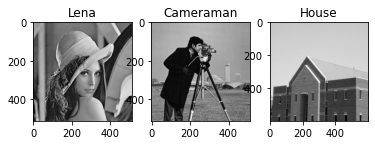


Imagens com escala reduzida em 1.5x


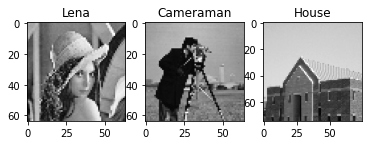


Imagens com escala aumentada em 2.5x


KeyboardInterrupt: 

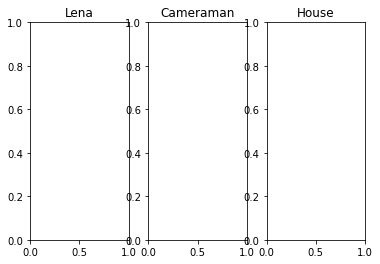

In [9]:
if __name__ == "__main__":
    main()
    